In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('E:/sentiment analysis of chatGPT/file.csv')

In [4]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [5]:
df.shape

(219294, 3)

In [6]:
df.size

657882

In [7]:
df.columns

Index(['Unnamed: 0', 'tweets', 'labels'], dtype='object')

In [8]:
df.nunique()

Unnamed: 0    219294
tweets        217622
labels             3
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

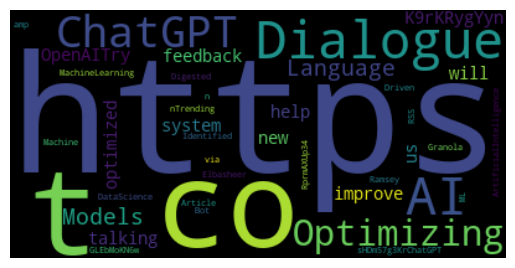

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = df.tweets[0]+df.tweets[1]+df.tweets[2]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

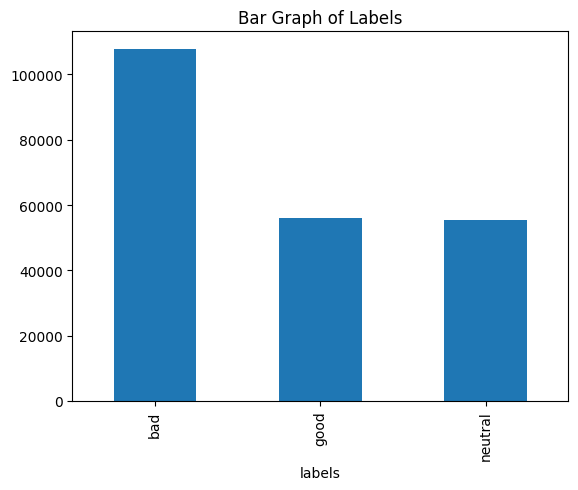

In [12]:
df.groupby('labels').size().plot(kind='bar')
plt.title('Bar Graph of Labels')
plt.show() 

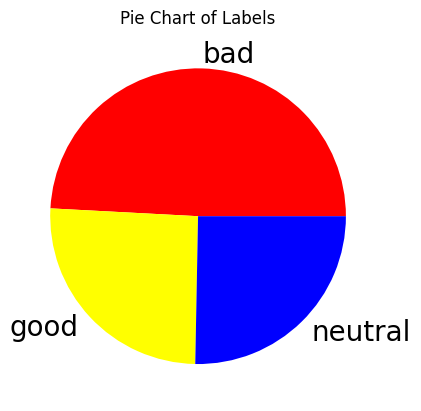

In [13]:
df.groupby('labels').size().plot(kind='pie', textprops={'fontsize': 20},
                                  colors=['red', 'yellow', 'blue'])
plt.title('Pie Chart of Labels')
plt.show() 

In [14]:
# No of NULL values in each column
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  219294


,Total Missing,In Percent
Unnamed: 0,0,0.0
tweets,0,0.0
labels,0,0.0


In [15]:
df['labels'].unique
df['labels'].value_counts

<bound method IndexOpsMixin.value_counts of 0         neutral
1            good
2         neutral
3            good
4             bad
           ...   
219289        bad
219290       good
219291        bad
219292        bad
219293    neutral
Name: labels, Length: 219294, dtype: object>

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['labels'] = le.fit_transform(df['labels'])
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,2
1,1,"Try talking with ChatGPT, our new AI system wh...",1
2,2,ChatGPT: Optimizing Language Models for Dialog...,2
3,3,"THRILLED to share that ChatGPT, our new model ...",1
4,4,"As of 2 minutes ago, @OpenAI released their ne...",0


In [17]:
df0=df[df['labels']==0]
df1=df[df['labels']==1]
df2=df[df['labels']==2]

# Peeking at the distribution between each label
df0.shape, df1.shape, df2.shape

((107796, 3), (56011, 3), (55487, 3))

In [18]:
df0=df0[:int(df0.shape[0]/100)]
df1=df1[:int(df1.shape[0]/100)]
df2=df2[:int(df2.shape[0]/100)]

In [19]:
df0.shape, df1.shape, df2.shape

((1077, 3), (560, 3), (554, 3))

In [20]:
# Combining the data 
df=pd.concat([df0,df1,df2],axis=0)

# Randomizing the data
df = df.sample(frac = 1)

In [21]:
#Remove Hashtags
df['tweets'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)
#Remove Mention
df['tweets'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)
#Remove URL
df['tweets'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)
# Remove lowercase so that computer does not differentiate between FUN and lovely
df['tweets']=df['tweets'].str.lower()

In [22]:
# Import stopwords with nltk.
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

df['tweets'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nihar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

df['tweets'] = df['tweets'].apply(lambda x: stemming(x))

df.head()

,Unnamed: 0,tweets,labels
776,776,want extra lazy make chatgpt write blog post (...,2
1427,1427,"future released today, people aren’t kidding s...",1
401,401,chatgpt openai https://t.co/a5jvlwp2w0,0
1483,1483,"wow, new decode base64 https://t.co/iemiu3uc4i",1
441,441,"telling wife replied sometimes does, wants go ...",0


In [24]:
# Removing Punctuations
import string

def remove_punc(text):
    for word in text:
        if word in string.punctuation:
            text = text.replace(word,'')
    return text

df['tweets'] = df['tweets'].apply(lambda x:remove_punc(x))

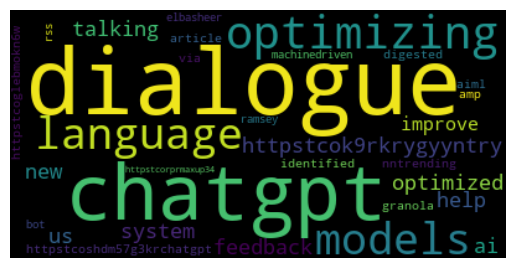

In [25]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = df.tweets[0]+df.tweets[1]+df.tweets[2]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

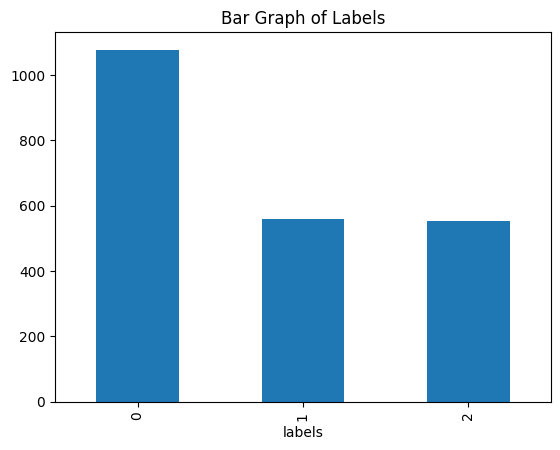

In [26]:
df.groupby('labels').size().plot(kind='bar')
plt.title('Bar Graph of Labels')
plt.show()

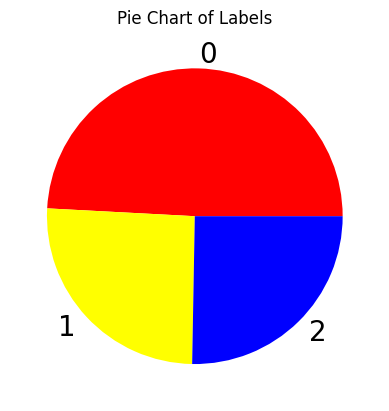

In [27]:
df.groupby('labels').size().plot(kind='pie', textprops={'fontsize': 20},
                                  colors=['red', 'yellow', 'blue'])
plt.title('Pie Chart of Labels')
plt.show() 

TF-IDF(Term Frequency-Inverse Document Frequency)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
y = df['labels']
x = df['tweets']

# Creating a word corpus for vectorization
wordbag = []
for i in range(x.shape[0]):
    wordbag.append(x.iloc[i])
    
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names_out()
denselist1 = X1.todense().tolist()
df = pd.DataFrame(denselist1, columns=feature_names1)

In [34]:
X_temp, X_test, y_temp, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

In [35]:
X_temp['labels'] = y_temp
X_temp.head()

,10,100,12,13,15,20,2021,2022,50,ability,...,wrong,wrote,wtf,year,years,yes,yesterday,yet,you,labels
1023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
zero = X_temp[X_temp['labels'] == 0]
zero.shape[0]
one = X_temp[X_temp['labels'] == 1]
one.shape[0]
two = X_temp[X_temp['labels'] == 2]
two.shape[0]

349

In [37]:
ds = pd.concat([zero,one], axis = 0)

In [38]:
corpus = []
for i in range(ds.shape[0]):
    corpus.append(ds.iloc[i][0])

C:\Users\nihar\AppData\Local\Temp\ipykernel_10408\73674363.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corpus.append(ds.iloc[i][0])


In [39]:
'''from sklearn.feature_extraction.text import CountVectorizer
vectorizer_train = CountVectorizer(max_features=1000)
vocabulary_train = vectorizer_train.fit_transform(corpus)
bow = pd.DataFrame(vocabulary_train.toarray(), columns = vectorizer_train.get_feature_names())'''

'from sklearn.feature_extraction.text import CountVectorizer\nvectorizer_train = CountVectorizer(max_features=1000)\nvocabulary_train = vectorizer_train.fit_transform(corpus)\nbow = pd.DataFrame(vocabulary_train.toarray(), columns = vectorizer_train.get_feature_names())'

In [40]:
# splitting the training and testing part from the data
X_temp, X_test, y_temp, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

# For creating a table of the accuracies in the end
accuracy = {'TF-IDF':[]}

# Linear Regression
linregressor_LR_tf = LinearRegression()
linregressor_LR_tf.fit(X_temp, y_temp)
y_predict_LR_tf = linregressor_LR_tf.predict(X_test)
a=(linregressor_LR_tf.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

# Logistic Regression
regressor_LR_tf = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(X_temp, y_temp)
y_predict_LR_tf = regressor_LR_tf.predict(X_test)
a=(regressor_LR_tf.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

# Decision Tree
model_DT_tf = DecisionTreeClassifier(criterion = 'gini', max_depth=2) 
model_DT_tf.fit(X_temp, y_temp)
y_predict_DT_tf = model_DT_tf.predict(X_test)
a=(model_DT_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

# Random Forest
model_RF_tf = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_tf.fit(X_temp, y_temp)
y_predict_RF_tf = model_RF_tf.predict(X_test)
a=(model_RF_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

# K-Neighbors Classifier
model_KN_tf = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_tf.fit(X_temp, y_temp)
y_predict_KN_tf = model_KN_tf.predict(X_test)
a=(model_KN_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

In [41]:
# Evaluation
model = ['LiR','LoR','DT','RF','KN']
data = {'model':model,'accuracy':accuracy['TF-IDF']}
compare_models = pd.DataFrame(data)
compare_models

,model,accuracy
0,LiR,-6.610012e+24
1,LoR,6.628702e-01
2,DT,5.284738e-01
3,RF,6.856492e-01
4,KN,5.421412e-01


From the above accuracies, we can infer that Linear Regression is not a suitable model for the given dataset

In [42]:
# splitting the training and testing part from the data
X_temp, X_test, y_temp, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

# For creating a table of the accuracies in the end
accuracy = {'TF-IDF':[]}

# Logistic Regression
regressor_LR_tf = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(X_temp, y_temp)
y_predict_LR_tf = regressor_LR_tf.predict(X_test)
a=(regressor_LR_tf.score(X_test, y_test))*100
accuracy['TF-IDF'].append(a)

# Decision Tree
model_DT_tf = DecisionTreeClassifier(criterion = 'gini', max_depth=2) 
model_DT_tf.fit(X_temp, y_temp)
y_predict_DT_tf = model_DT_tf.predict(X_test)
a=(model_DT_tf.score(X_test,y_test))*100
accuracy['TF-IDF'].append(a)

# Random Forest
model_RF_tf = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_tf.fit(X_temp, y_temp)
y_predict_RF_tf = model_RF_tf.predict(X_test)
a=(model_RF_tf.score(X_test,y_test))*100
accuracy['TF-IDF'].append(a)

# K-Neighbors Classifier
model_KN_tf = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_tf.fit(X_temp, y_temp)
y_predict_KN_tf = model_KN_tf.predict(X_test)
a=(model_KN_tf.score(X_test,y_test))*100
accuracy['TF-IDF'].append(a)

In [43]:
# Evaluation
model = ['LoR','DT','RF','KN']
data = {'model':model,'accuracy':accuracy['TF-IDF']}
compare_models = pd.DataFrame(data)
compare_models

,model,accuracy
0,LoR,66.287016
1,DT,52.847380
2,RF,68.564920
3,KN,54.214123


<BarContainer object of 4 artists>

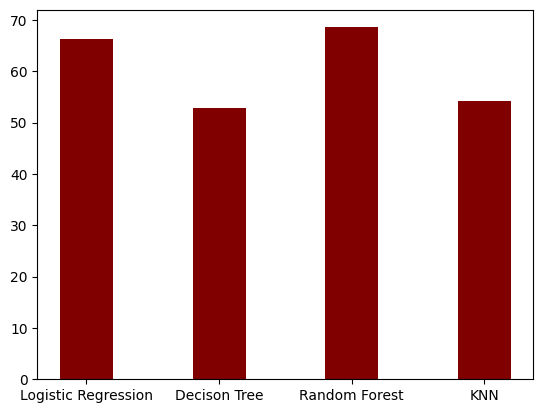

In [44]:
# creating the bar plot
algos = ['Logistic Regression','Decison Tree','Random Forest','KNN']
plt.bar(algos, accuracy['TF-IDF'], color ='maroon',
        width = 0.4)

Hyperparameter Tuning

In [45]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

Logistic Regression

In [46]:
accuracy2 = {'TF-IDF':[]}
regressor_LR_tf2 = LogisticRegression(C=1.0,penalty='l1',solver='saga')
regressor_LR_tf2.fit(X_temp, y_temp)
y_predict_LR_tf2 = regressor_LR_tf2.predict(X_test)
a2=(regressor_LR_tf2.score(X_test, y_test)) *100
accuracy2['TF-IDF'].append(a2)

c:\Users\nihar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Decision Tree

In [47]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.datasets import load_iris

X = X_test
Y = y_test
clf = tree.DecisionTreeClassifier(max_depth = 15,min_samples_leaf = 4,criterion = 'entropy',splitter = 'best')
clf = clf.fit(X,Y)
a2=(clf.score(X_test, y_test))*100
accuracy2['TF-IDF'].append(a2)

Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
rfc = RandomForestClassifier()
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_temp, y_temp)
print(clf.best_params_)
print(clf.best_score_)

c:\Users\nihar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nihar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nihar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\nihar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

{'max_depth': 14, 'max_features': 13}
0.5530876623376624


In [49]:
a2=clf.best_score_ *100
accuracy2['TF-IDF'].append(a2)

In [50]:
accuracy2['TF-IDF']

[67.42596810933941, 70.15945330296127, 55.308766233766235]

KNN

In [51]:
neigh = KNeighborsClassifier(n_neighbors=3)
param = {'n_neighbors':[3,5] ,'weights':['uniform','distance'] ,'p':[1,2]}
grid = GridSearchCV(neigh,param,cv=5)
grid.fit(X_temp, y_temp)
a2=clf.best_score_ *100
accuracy2['TF-IDF'].append(a2)

In [52]:
accuracy2['TF-IDF']

[67.42596810933941, 70.15945330296127, 55.308766233766235, 55.308766233766235]

In [53]:
# Evaluation
model = ['LoR','DT','RF','KN']
data = {'model':model,'accuracy':accuracy2['TF-IDF']}
compare_models = pd.DataFrame(data)
compare_models

,model,accuracy
0,LoR,67.425968
1,DT,70.159453
2,RF,55.308766
3,KN,55.308766


<BarContainer object of 4 artists>

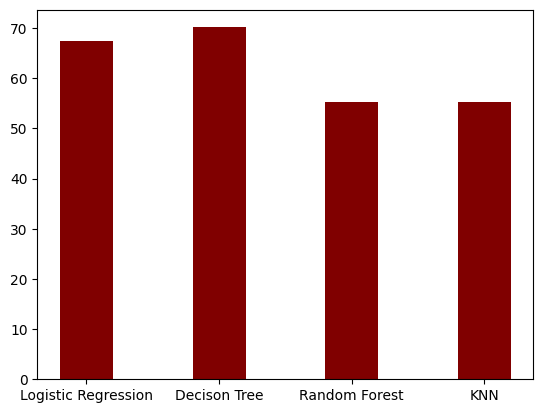

In [54]:
# creating the bar plot
algos = ['Logistic Regression','Decison Tree','Random Forest','KNN']
plt.bar(algos, accuracy2['TF-IDF'], color ='maroon',
        width = 0.4)

<BarContainer object of 8 artists>

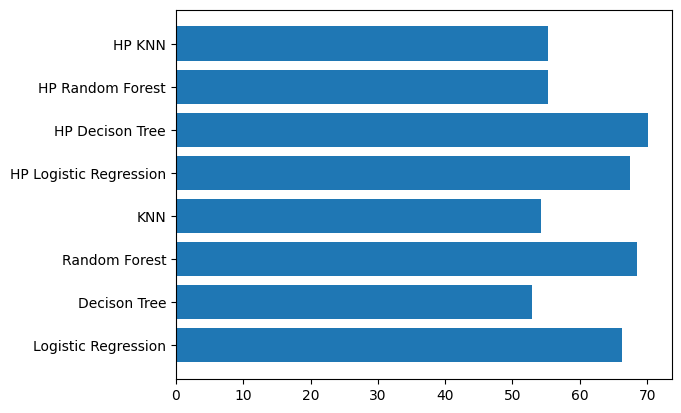

In [55]:
# HP Stands for Hyper Parametrized 
algos = ['Logistic Regression','Decison Tree','Random Forest','KNN','HP Logistic Regression','HP Decison Tree','HP Random Forest','HP KNN']

accuracies = accuracy['TF-IDF'] + accuracy2['TF-IDF']
plt.barh(algos,accuracies)

Random Forest model gave the most accuracy in the first part, and decison tree gave the most accuracy after hyperparameter tuning. This is because the quality of parameters increased for decision tree.

Except KNN algorithm, all other algorithms have shown changes in their accuracies after hyperparameter tuning.